## Rocket sciense is so cool!

This document has couple of text about my new programm, wich can calculate a reactive moution of rockets.

For calculations was used 2 methods:
1. Euler method modification for solving 2nd order differential equasions over a vector space.
2. Modificated classical Runge–Kutta method (for solving 2nd order differential equasions over a vector space
I tried to realize Runge–Kutta–Nyström method, witch prbably the best for tasks of this kind, but is was way too difficult :(
Also, I realized 6th-order Runge–Kutta method, but it's not wery useful in realities of the current task, so, I don't include that to this project.

Whih more complicated method (2) we can do less iteration with sufficient accuracy.
This is really usefull because it's pretty difficult to compute some not optimizet parts of code.

## Euler and RK4

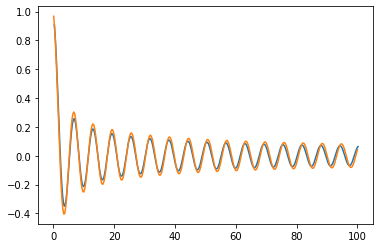

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special

def euler(F, y, dy, t, T, dt):
	Ts = []
	Ys = []
	while t < T:
		dy += F(t, y, dy)*dt
		y += dy*dt
		t+=dt
		Ts.append(t)
		Ys.append(y)
	plt.plot(Ts,Ys)
	
def runge_kutta_4(F, y, dy, t, T, dt):
	Ts = []
	Ys = []

	k1, k2, k3, k4 = 0,0,0,0
	q1, q2, q3, q4 = 0,0,0,0

	while t < T:
		k1 = dt * dy
		q1 = dt * F(t, y, dy)

		k2 = dt * (dy + q1/2)
		q2 = dt * F(t + dt/2, y + k1/2, dy + q1/2)

		k3 = dt * (dy + q2/2)
		q3 = dt * F(t + dt/2, y + k2/2, dy + q2/2)

		k4 = dt * (dy + q3)
		q4 = dt * F(t + dt, y + k3, dy + q3)

		y += (k1+2*k2+2*k3 + k4)/6
		dy += (q1+2*q2+2*q3 + q4)/6

		Ts.append(t)
		Ys.append(y)

		t+=dt
	plt.plot(Ts,Ys)

def F(t, y, dy):
	return -dy/t - y


euler(F, 1, 0, 0.01, 100, 0.3)
runge_kutta_4(F, 1, 0, 0.1, 100, 0.3) #one of the Bessel functions of first kind :)

plt.show()



## Euler vs RK4

In [51]:
def euler(F, y, dy, t, T, dt):
	while t < T:
		dy += F(t, y, dy)*dt
		y += dy*dt
		t+=dt
	
def runge_kutta_4(F, y, dy, t, T, dt):
	k1, k2, k3, k4 = 0,0,0,0
	q1, q2, q3, q4 = 0,0,0,0
	while t < T:
		k1 = dt * dy
		q1 = dt * F(t, y, dy)

		k2 = dt * (dy + q1/2)
		q2 = dt * F(t + dt/2, y + k1/2, dy + q1/2)

		k3 = dt * (dy + q2/2)
		q3 = dt * F(t + dt/2, y + k2/2, dy + q2/2)

		k4 = dt * (dy + q3)
		q4 = dt * F(t + dt, y + k3, dy + q3)

		y += (k1+2*k2+2*k3 + k4)/6
		dy += (q1+2*q2+2*q3 + q4)/6
		t+=dt

%timeit euler(F, 1, 0, 0.01, 100, 0.3)
%timeit euler(F, 1, 0, 0.01, 100, 0.03)
%timeit runge_kutta_4(F, 1, 0, 0.01, 100, 0.3)

449 µs ± 3.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.45 ms ± 7.96 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.24 ms ± 17.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


We need comparate only euler(0.03) and RK4(0.3) becouse we need much more steps in euler method for getting the same accuracy
At least, we have x2 speed with using this alorithm. But this numbers will increase in more complicated tasks.

# Physics

$M a = dm \cdot u + Mg + F_{res}$

In the programm I conclude in computings:
1. jet propulsion $dm \cdot u$
2. air resistance $k \cdot S \cdot v^2 \cdot ρ/2$
3. reducing the gravitational acceleration with height
4. reducing air density with height

There no any formula for (4) in the internet. But there is some data about that: https://ru.wikipedia.org/wiki/Стандартная_атмосфера

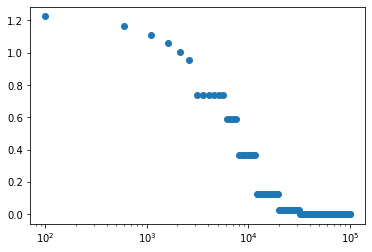

In [52]:
#some values from wikipedia
def air_ρ(r):
        h = r
        if h < 500: return 1.225
        if h < 1000: return 1.167
        if h < 1500: return 1.112
        if h < 2000: return 1.058
        if h < 2500: return 1.007
        if h < 3000: return 0.957

        if h < 6000: return 0.737

        if h < 8000: return 0.59

        if h < 12000: return 0.365

        if h < 20000: return 0.122

        if h < 32000: return 0.025

        if h < 100000: 0.0000185
        if h < 150000: 0.000000555
        if h < 200000: 0.000000002
        if h < 300000: 0.000000000252
        if h < 300000: 0.000000000252

        return 0
x = np.arange(100, 100000, 500)
y = []
for i in x:
    y.append(air_ρ(i))

fig = plt.figure()
ax = plt.gca()
ax.set_xscale('log')

ax.scatter(x, y)
plt.show()

This is looks like erf() function. That's pretty good!

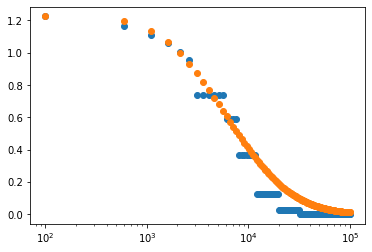

In [10]:
z = []
for i in x:
    z.append((1+scipy.special.erf(((np.log(6000))-np.log(i))*0.6))*1.225/2)
fig = plt.figure()
ax = plt.gca()
ax.set_xscale('log')

ax.scatter(x, y)
ax.scatter(x, z)
plt.show()

That is pretty accurate, so we can use this appoximation in code:
$o(h) \approx \Big(1+erf \big(5.2-0.6\ln h  \big) \Big) \cdot ρ(0)/2$

# Few information about code:
1. PlotStyle class help me to create an interesting design of plots.
2. We sould use "st.do_aspect = 1" if we need to see a 1:1 scale of the rocket path.
3. Om the top plot there is a black cross. This is the point at which fuel runs out.
4. Om the middle plot thre is 3 lines: green = absolute value of air resistance, blue = x_component, orange = y_component



